- Supervised machine learning is one of the mostcommonly used and successful types of machine learning.

- Last chapter: classifying iris flowers into several species using physical measurements of the flowers.

### Remember that supervised learning is used whenever we want to predict a certainoutcome from a given input, and we have examples of input-output pairs. We build a machine learning model from these input-output pairs, which comprise our training set. 


## Our goal is to make accurate predictions to new, never-before seen data.

- Supervised learning often requires human effort to build the training set, but afterwards automates and often speeds up an otherwise laborious or infeasible task.

# 2.1 Classification and Regression


 - There are two major types of supervised machine learning algorithms, called classification and regression.
 
 - In classification, the goal is to predict a class label, which is a choice from a predefined list of possibilities.
 
 - Classification is sometimes separated intobinary classification, which is the special case of distinguishing between exactly two classes, and multi-class classification which is classificaFItion between more than two classes.
 
  - In binary classification we often speak of one class being the positive classand the other class being the negative class. Here, positive don't represent benefit or value, but rather what the object of study is. So when looking for spam, “positive”could mean the spam class. Which of the two classes is called positive is often a subjective manner, and specific to the domain.
  
  
## For regression tasks, the goal is to predict a continuous number, or a floating point number in programming terms (a real number in mathematical terms).

## An easy way to distinguish between classification and regression tasks is to ask whether there is some kind of ordering or continuity in the output.

### If there is an ordering, or a continuity between possible outcomes, then the problem is a regression problem.

 - Think about predicting annual income. There is a clear ordering of “making moremoney” or “making less money”. There is a natural understanding that 40.000 \$ per year is between 50.000 \$ per year and 30.000 \$ per year. There is also a continuity in the output. Whether a person makes 40,000 \$ or 40,001\$ a year does not make a tangible difference, even though they are different amounts of money. So if our algorithm predicts 39,999 \$ or 40,001\$ when it should have predicted 40,000$$, we don’t mind that much.

# 2.2 Generalization, Overfitting and Underfitting 

- In supervised learning, we want to built a model on the training data, and then beable to make accurate predictions on new, unseen data, that has the same characteristicsas the training set that we used. If a model is able to make accurate predictions on unseen data, we say it is able to generalize from the training set to the test set.

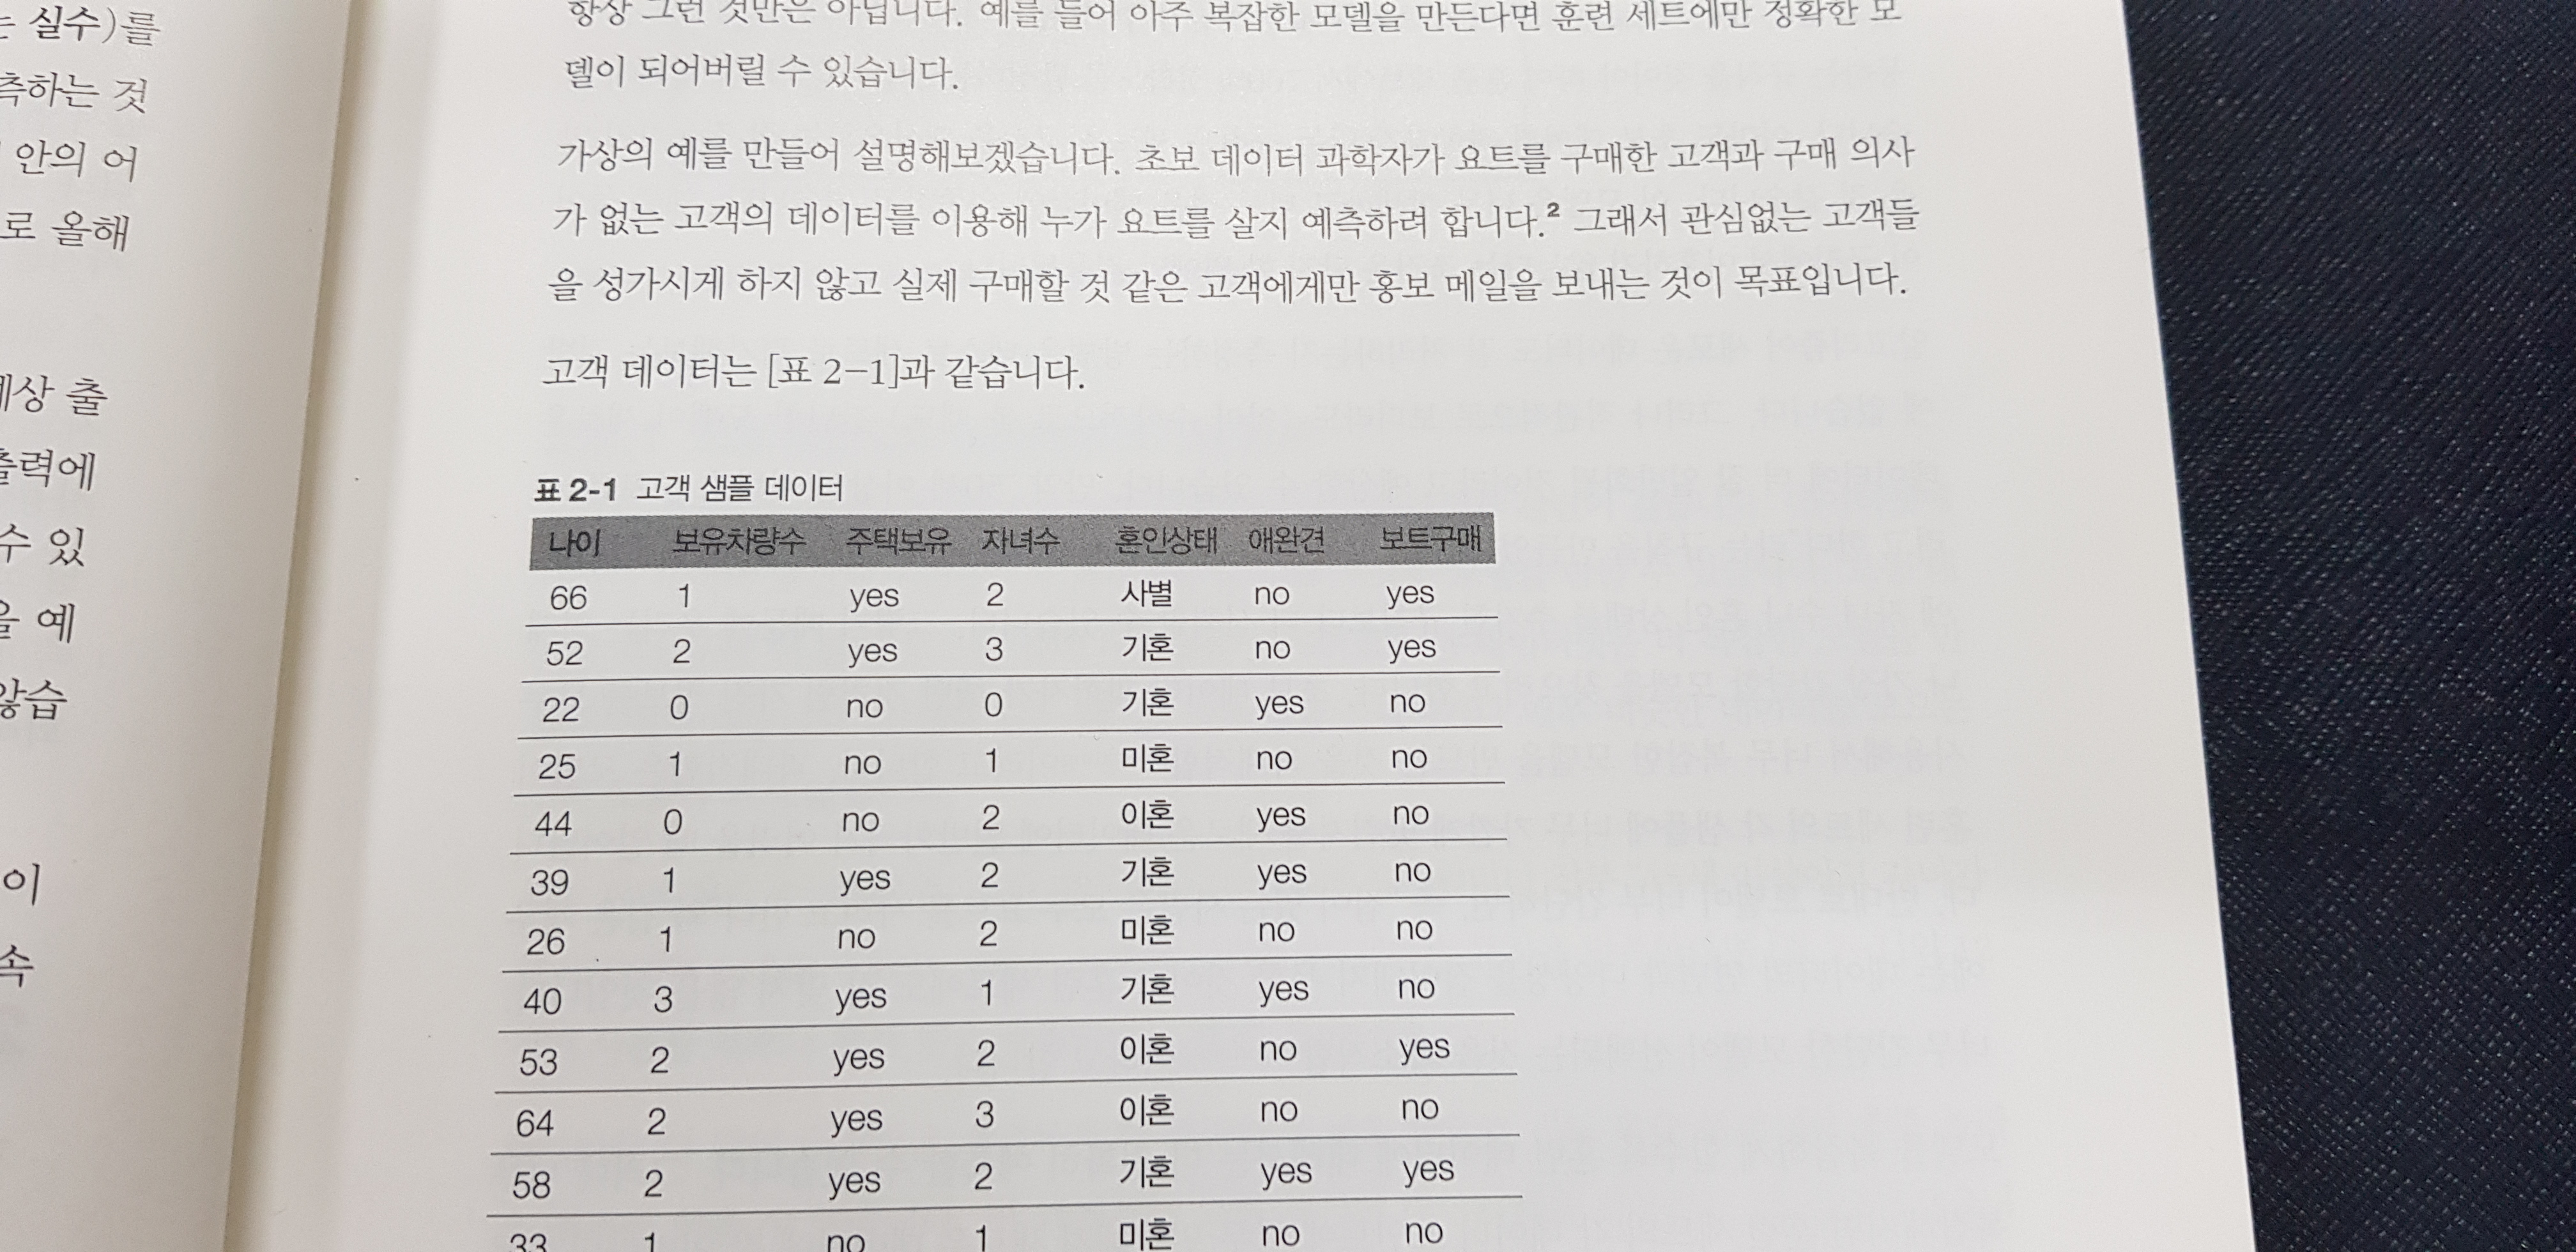

In [1]:
from IPython.display import Image 
Image(filename ='image.jpg')

 - "45세 이상이고 자녀가 셋 미만이면 이혼하지 않은 고객은 요트를 살 것입니다."
 
 - 데이터에 국한이 되면 모델이 정확함.
 
 - 중요한 것은 이 데이터셋만 사용하지 않음.
 
 - 새로운 고객을 볼때, 이사람이 보트를 구입할 것인가 ? 
 
 - 간단한 모델이 새로운 데이터에 더 잘 일반화될 것이라고 예상됨.
 
 - "50세 이상인 사람은 보트를 사려고 한다"라는 새로운 규칙을 만들었다면, 자녀수나 혼인상태를 추가한 규칙을 더 신뢰.
 
## 가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것을 과대 적합(Overfitting)이라고 함.

 - 과대적합은 모델이 훈련센트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때 일어남.
 
 - 반대로 모델이 너무 간단하면, 즉 "집이 있는 사람은 모두 요트를 사려고 한다."와 같은 경우에는 데이터의 면면과 다양성을 잡아내지 못할 것이고, 훈련세트에도 잘 맞지 않음.
 
 - 너무 간단한 모델이 선택되는 것을 과소적합(UnderFitting)이라고 함.

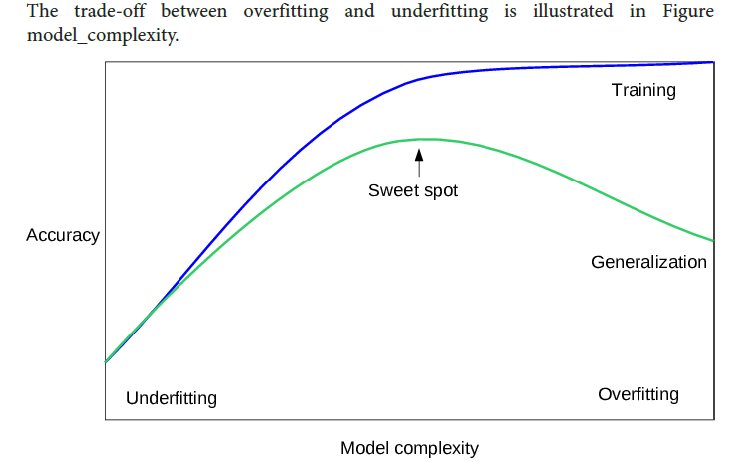

In [2]:
from IPython.display import Image 
Image(filename ='image1.png')

## 2.2.1 모델 복잡도와 데이터셋 크기의 관계

 - 모델의 복잡도는 훈련 데이터셋에 담긴 입력 데이터의 다양성과 관련이 깊습니다. 데이터셋에 다양한 데이터 포인트가 많을수록 과대적합 업이 더 복잡한 모델을 만들 수 있음. 
 
 - 데이터를 더 많이 수집하고 적절하게 더 복잡한 모델을 만들면 지도 학습 문제에서 종종 놀라운 결과를 얻을수 있음.
 
 - 데이터양의 힘을 과소평가하지 마세요.
 
 
# Supervised Machine Learning Algorithms

- We will now go through the most popular machine learning algorithms and explainhow they learn from data and how they make predictions. We will also discuss how the concept of model complexity plays out for each of these models.




- We will also discuss strength and weaknesses of each algorithm, and what kind ofdata they can be best applied to. We will also explain the meaning of the most importantparameters and options. Discussing all of them is beyond the scope of the book, and we refer you to the scikit-learn documentation for more details.


### An example of a synthetic two-class classification dataset is the forge dataset, which has two features.

X.shape: (26, 2)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


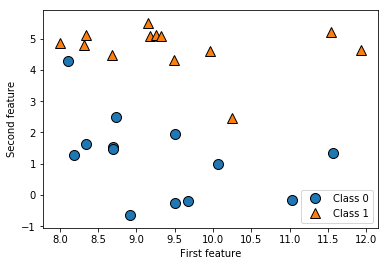

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn
import numpy as np


# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

To illustrate regression algorithms, we will use the synthetic wave dataset shown below. The wave dataset only has a single input feature, and a continuous target variable (or response) that we want to model.

Text(0,0.5,'Target')

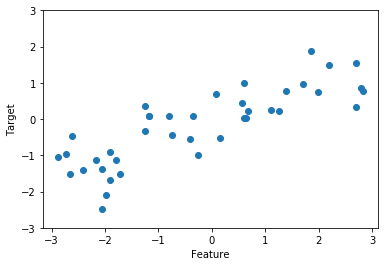

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

## We are using these very simple, low-dimensional datasets as we can easily visualizethem -- a computer monitor has two dimensions, so data with more than two featuresis hard to show. Any intuition derived from datasets with few features (alsocalled low-dimensional datasets) might not hold in datasets with many features (highdimensional datasets). As long as you keep that in mind, inspecting algorithms on low-dimensional datasets can be very instructive.

## We will complement these small synthetic dataset with two real-world datasets that are included in scikit-learn. One is the Wisconsin breast cancer dataset (or cancer for short), which records clinical measurements of breast cancer tumors. Each tumor is labeled as “benign” (for harmless tumors) or “malignant” (for cancerous tumors), and the task is to learn to predict whether a tumor is malignant based on the measurements of the tissue.

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


All you need to know about Bunch objects is that they behave like dictionaries, withthe added benefit that you can access values using a dot (as in bunch.key instead of bunch['key']).

In [6]:
print("Shape of cancer data:", cancer.data.shape)

Shape of cancer data: (569, 30)


In [7]:
print("Sample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

# https://wikidocs.net/32

Sample counts per class:
 {'malignant': 212, 'benign': 357}


In [8]:
print("Feature names:\n", cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


We will also be using a real-world regression dataset, the Boston Housing dataset.


The task associated with this dataset is to predict the median value of homes in several\Boston neighborhoods in the 1970s, using information about the neighborhoods such as crime rate, proximity to the Charles River, highway accessibility and so on.

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:", boston.data.shape)

Data shape: (506, 13)


 - For our purposes here, we will actually expand this dataset, by not only consideringthese 13 measurements as input features, but also looking at all products (also called interactions) between features.
 
 - In other words, we will not only consider crime rate and highway accessibility as afeature, but also the product of crime rate and highway accessibility. Includingderived feature like these is called feature engineering, which we will discuss in more detail in Chapter 5 (Representing Data).

In [10]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


The resulting 105 features are the 13 original features, the 13 choose 2 = 91 (Footnote:the number of ways to pick 2 elements out of 13 elements) features that are product of two features, and one constant feature.

# 2.3.2 k-Nearest Neighbor 

 - The k-Nearest Neighbors (kNN) algorithm is arguably the simplest machine learning algorithm.
 
 - To make aprediction for a new data point, the algorithm finds the closest data points in the training dataset, it “nearest neighbors”.
 
 ## k-Neighbors Classification
 
  - In its simplest version, the algorithm only considers exactly one nearest neighbor, which is the closest training data point to the point we want to make a prediction for.
  
  - The prediction is then simply the known output for this training point.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


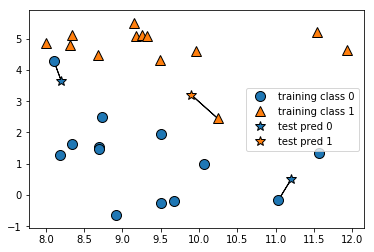

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


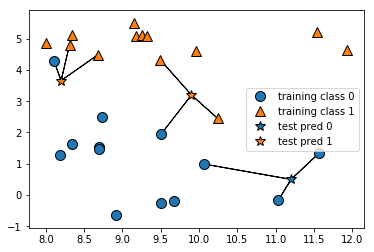

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Instead of considering only the closest neighbor, we can also consider an arbitrarynumber $k$ of neighbors

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


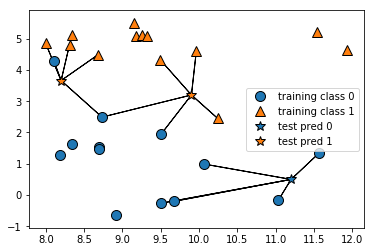

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

Now let’s look at how we can apply the $k$ nearest neighbors algorithm using scikitlearn.

First, we split our data into a training and a test set, so we can evaluate generalization performance, as discussed in Chapter 1(Introduction).

In [14]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Next we import and instantiate the class. This is when we can set parameters, like the number of neighbors to use. Here, we set it to three.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [16]:
clf.fit(X_train, y_train)

# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# https://en.wikipedia.org/wiki/Minkowski_distance


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

To make predictions on the test data, we call the predict method. This computes the nearest neighbors in the training set and finds the most common class among these:

In [17]:
print("Test set predictions:", clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


To evaluate how well our model generalizes, we can call the score method with the test data together with the test labels:

In [18]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


In [19]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)

In [20]:
clf.fit(X_train, y_train)

# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# https://en.wikipedia.org/wiki/Minkowski_distance


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [21]:
print("Test set predictions:", clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


In [22]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


# Analyzing KNeighborsClassifier

- For two-dimensional datasets, we can also illustrate the prediction for all possible test point in the xy-plane

- This lets us view the decision boundary,which is the divide between where the algorithm assigns class red versus where it assigns class blue

- Here is a visualization of the decision boundary for one, three and five neighbors: 

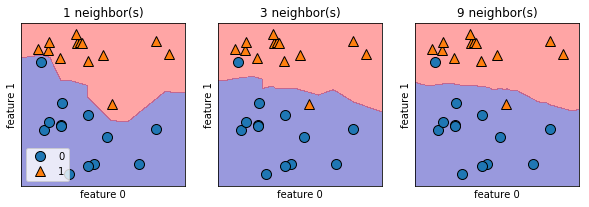

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

 - As you can see in the left figure, using a single neighbor results in a decision boundarythat follows the training data closely. Considering more and more neighbors leads to a smoother decision boundary.
 
 - In other words, using few neighbors corresponds to high model complexity(as shown on the right side of Figure model_complexity), and using many neighbors corresponds to low model complexity (as shown on the left side of Figure model_complexity).
 
  - Let’s investigate whether we can confirm the connection between model complexity and generalization that we discussed above.

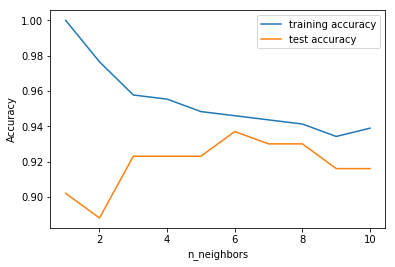

In [24]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

While the real world plots are rarely very smooth, we can still recognize some of the characteristics of overfitting and underfitting.

# k-Neighbors Regression

 - There is also a regression variant of the k-nearest neighbors algorithm.
 - This time using the wave dataset.

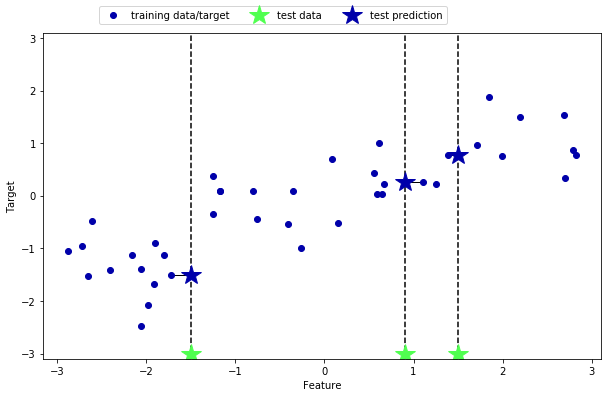

In [25]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

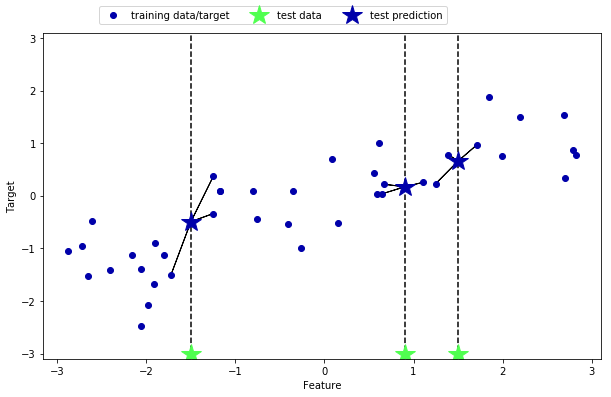

In [26]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [27]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [28]:
print("Test set predictions:\n", reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [29]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


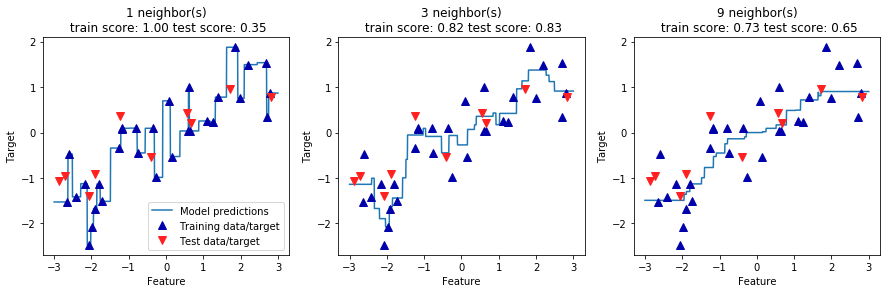

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")


# http://www.fairlynerdy.com/what-is-r-squared/
# https://en.wikipedia.org/wiki/Coefficient_of_determination

## Strengths, weaknesses and parameters

 - In principal, there are two important parameters to the KNeighbors classifier: the number of neighbors and how you measure distance between data points.
 
 -  You should certainly adjust this parameter.
 
 - One of the strengths of nearest neighbors is that the model is very easy to understand, and often gives reasonable performance without a lot of adjustments.  
  
  
 - Building the nearest neighbors model is usually very fast, but when your trainingset is very large (either in number of features or in number of samples) prediction can be slow. 
 
 - Nearest neighbors often does not perform well on dataset with very many features, in particular sparse datasets, a common type of data in which there are many features, but only few of the features are non-zero for any given data point.
 
 ## 2.3.2Linear Models
 
 - Linear models are models that make a prediction that using a linear function of the input features, which we will explain below.
 
### Linear models for regression

\begin{align*}
&\hat{y} = w[0] x[0] + w[1] x[1] + \dotsc + w[p] x[p] + b \text{ (1) linear regression}
\end{align*}


# https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86

# https://brownmath.com/stat/leastsq.htm

# https://medium.com/@purnasaigudikandula/linear-regression-in-python-with-cost-function-and-gradient-descent-bde9a8d2626

# https://brunch.co.kr/@gimmesilver/18

w[0]: 0.393906  b: -0.031804


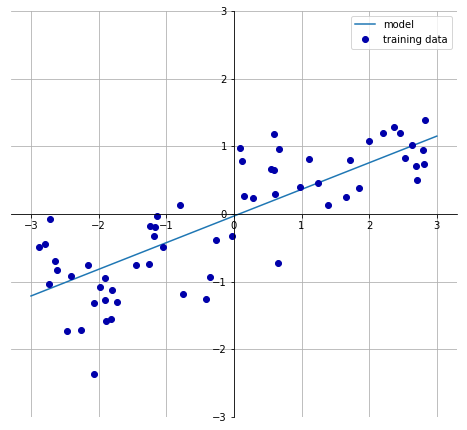

In [31]:
mglearn.plots.plot_linear_regression_wave()

 - Linear models for regression can be characterized as regression models for which the prediction is a line for a single feature, a plane when using two features, or a hyperplane in higher dimensions (that is when having more features).
 
  - If you compare the predictions made by the red line with those made by the KNeighborsRegressorin Figure nearest_neighbor_regression, using a straight line to make predictions seems very restrictive.
  
   - It looks like all the fine details of the data are lost.
   
   - For datasets with many features, linear models can be very powerful.
   
   - There are many different linear models for regression. The difference between thesemodels is how the model parameters $w$ and $b$ are learned from the training data, and how model complexity can be controlled. We will now go through the most popular linear models for regression.

# Linear Regression aka Ordinary Least Squares

*Linear regression or Ordinary Least Squares (OLS) is the simplest and most classic linear method for regression.* 



 - Linear regression finds the parameters $w$ and $b$ that minimize the mean squaredn error between predictions and the true regression targets $y$ on the training set. The mean squared error is the sum of the squared differences between the predictions and the true values


 *Linear regression has no parameters, which is a benefit, but it also has no way to control model complexity.*

In [32]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

The “slope” parameters w, also called weights or coefficients are stored in the coef_ attribute, while the offset or intercept b is stored in the intercept_ attribute. [Footnote:you might notice the strange-looking trailing underscore]

In [33]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


The intercept_ attribute is always a single float number, while the coef_ attribute is a numpy array with one entry per input feature. As we only have a single input feature in the wave dataset, lr.coef_ only has a single entry.

In [34]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


An $R^2$ of around .66 is not very good, but we can see that the score on trainingand test set are very close together. This means we are likely underfitting, not overfitting. For this one-dimensional dataset, there is little danger of overfitting, as themodel is very simple (or restricted).
 - Let’s take a look at how LinearRegression performs on a more complex dataset, likethe Boston Housing dataset. Remember that this dataset has 506 samples and 105 derived features.

In [35]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [36]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


 - This is a clear sign of overfitting, and therefore we should try to find a model that allows us to control complexity.
 
 - One of the most commonly used alternatives to standard linear regression is Ridge regression, which we will look into next.

# Ridge regression

 - Ridge regression is also a linear model for regression, so the formula it uses to make predictions is still Formula (1), as for ordinary least squares.
 
  - In Ridge regression,the coefficients w are chosen not only so that they predict well on the training data, but there is an additional constraint.
  
  - We also want the magnitude of coefficients to be as small as possible; in other words, all entries of w should be close to 0.
  
   - Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well.
   
   - Regularization meansexplicitly restricting a model to avoid overfitting. The particular kind used by Ridgeregression is known as l2 regularization. [footnote: Mathematically, Ridge penalizes the l2 norm of the coefficients, or the Euclidean length of w.]
   
   
   # https://towardsdatascience.com/ridge-regression-for-better-usage-2f19b3a202db

In [37]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("training set score: %f" % ridge.score(X_train, y_train))
print("test set score: %f" % ridge.score(X_test, y_test))

training set score: 0.885797
test set score: 0.752768


 - As you can see, the training set score of Ridge is lower than for LinearRegression, while the test set score is higher.
 
 - With linear regression, we were overfitting to our data. Ridge is a more restricted model, so we are less likely to overfit.
 
  - A less complex model means worse performance on the training set, but better generalization.

In [38]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


Above, we used the default parameter alpha=1.0.
There is no reason why this would give us the best trade-off, though. Increasing alpha forces coefficients to move more towards zero, which decreases training set performance,
but might help generalization.

In [39]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


 - A higher alpha means a more restricted model, so we expect that the entries of coef_ have smaller magnitude for a high value of alpha than for a low value of alpha.

This is confirmed in the plot below:

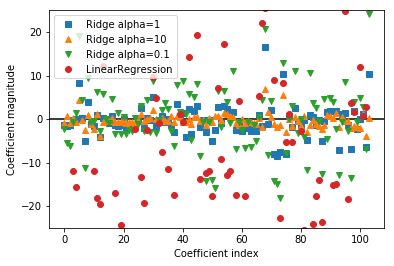

In [40]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

규제의 효과를 이해하는 또 다른 방법은 alpha 값을 고정하고 훈련데이터의 크기를 변화시켜 보는것. 

보스턴 주택가격 데이터셋에서 여러 가지 크기로 샘플링하여 Linear regression과 Ridge(alpha =1)을 적용한 것.
(데이터셋의 크기에 따른 모델의 성능 변화를 나타내는 그래프를 학습곡선(Learning Curve)라고 함.

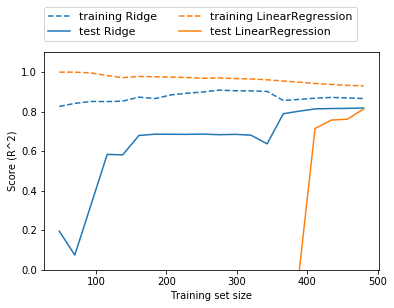

In [41]:
mglearn.plots.plot_ridge_n_samples()

릿지에는 규제가 적용되므로 릿지의 훈련 데이터 점수가 전체적으로 선형 회귀의 훈련 데이터 점수보다 낮음. 

그러나 테스트 데이터에서 릿지의 점수가 더 높으며 특별히 작은 작은 데이터셋에서 더 그렇습니다.

여기서 배울 있는 것은 데이터를 충분히 주면 규제항은 덜 중요해져서 릿지 회귀와 선형 회귀의 성능이 같아질 것이라는 점. 

선형 회귀의 훈련 데이터 성능이 감소한다는 것은 데이터가 많아 질수록 모델이 데이터를 기억하거나 과대적합하기 어려워지기 때문.

# Lasso
 - An alternative to Ridge for regularizing linear regression is the Lasso.
 
  - The lasso alsorestricts coefficients to be close to zero, similarly to Ridge regression, but in a slightly different way, called “l1” regularization.
  
 ## https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b 
 ## https://www.youtube.com/watch?v=NGf0voTMlcs
 
 
 
 
 - The consequence of l1 regularization is that when using the Lasso, some coefficients are exactly zero. This means some features are entirely ignored by the model. This can be seen as a form of automatic feature selection.

Let’s apply the lasso to the extended Boston housing dataset:

In [42]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


As you can see, the Lasso does quite badly, both on the training and the test set. This indicates that we are underfitting.

We find that it only used four of the 105 features.

Similarly to Ridge, theLasso also has a regularization parameter alpha that controls how strongly coefficients are pushed towards zero .

In [43]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


The performance is slightly better than using Ridge, and we are using only 32 of the 105 features. This makes this model potentially easier to understand.

  - If we set alpha too low, we again remove the effect of regularization and end up with a result similar to LinearRegression.

In [44]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Again, we can plot the coefficients of the different models, similarly to Figure ridge_coefficients

Text(0,0.5,'Coefficient magnitude')

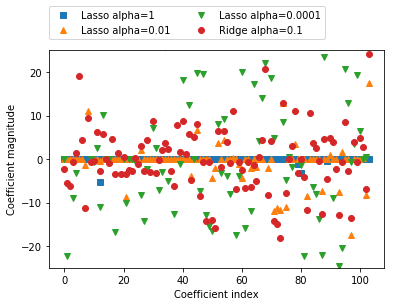

In [45]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

In practice, Ridge regression is usually the first choice between these two models. However, if you have a large amount of features and expect only a few of them to be important, Lasso might be a better choice. Similarly, if you would like to have a model that is easy to interpret, Lasso will provide a model that is easier to understand, as it will select only a subset of the input features.

 - Scikit-learn은 lasso와 Ridge의 패널티를 결합한 ElasticNet도 제공함. 이 조합은 최상의 성능을 내지만 L1 규제와 L2 규제를 위한 매개변수 두 개를 조정해야함. 
 
 # https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net

# Linear models for Classification

Linear models are also extensively used for classification. Let’s look at binary classification
first. In this case, a prediction is made using the following formula:
\begin{align*}
&\hat{y} = w[0] x[0] + w[1] x[1] + \dotsc + w[p] * x[p] + b > 0 &\text{ (2) linear
binary classification}
\end{align*}

- The formula looks very similar to the one for linear regression, but instead of just returning the weighted sum of the features, wethreshold the predicted value at zero.

 - If the function was smaller than zero, we predict the class -1, if it was larger than zero, we predict the class +1.
 
 - For linear models for regression, the output y was a linear function of the features: a line, plane, or hyperplane (in higher dimensions).
 



-  There are many algorithms for learning linear models. These algorithms all differ in the following two ways:
        - How they measure how well a particular combination of coefficients and intercept fits the training data.
        -If and what kind of regularization they use.
        
 - For our purposes, and many applications, the different choices for 1. (called loss function) is of little significance.
 
 
  - The two most common linear classification algorithms are logistic regression, implementedin linear_model.LogisticRegression and linear support vector machines(linear SVMs), implemented in svm.LinearSVC (SVC stands for Support Vector Classifier). Despite its name, LogisticRegression is a classification algorithm and not a regression algorithm, and should not be confused with LinearRegression.

We can apply the LogisticRegression and LinearSVC models to the forge dataset,and visualize the decision boundary as found by the linear models:

# https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html
# https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-ii-d20a239cde11


# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# https://shuzhanfan.github.io/2018/05/understanding-mathematics-behind-support-vector-machines/

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


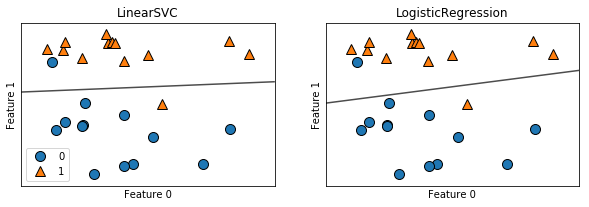

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

 - The two models come up with similar decision boundaries. Note that both misclassify two of the points. By default, both models apply an l2 regularization, in the same way that Ridge does for regression.
 
 - For LogisticRegression and LinearSVC the trade-off parameter that determines the strength of the regularization is called C, and higher values of C correspond to less regularization.
 
 
 - There is another interesting intuition of how the parameter C acts. Using low values of C will cause the algorithms try to adjust to the “majority” of data points, while using a higher value of C stresses the importance that each individual data point be classified correctly.

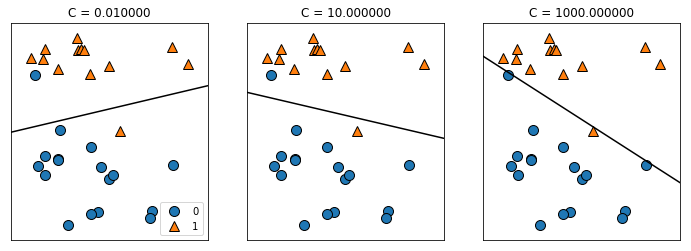

In [47]:
mglearn.plots.plot_linear_svc_regularization()

 - Similarly to the case of regression, linear models for classification might seem very restrictive in low dimensional spaces, only allowing for decision boundaries which are straight lines or planes. Again, in high dimensions, linear models for classification become very powerful, and guarding against overfitting becomes increasingly importantwhen considering more features.

In [48]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The default value of C=1 provides quite good performance, with 95% accuracy on both the training and the test set. As training and test set performance are very close, it is likely that we are underfitting. Let’s try to increase C to fit a more flexible model.

In [49]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


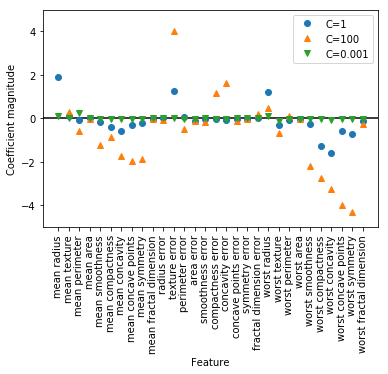

In [51]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

As LogisticRegression applies an L2 regularization by default, the result looks similar to Ridge in Figure ridge_coefficients. Stronger regularization pushes coefficients more and more towards zero, though coefficients never become exactly zero.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


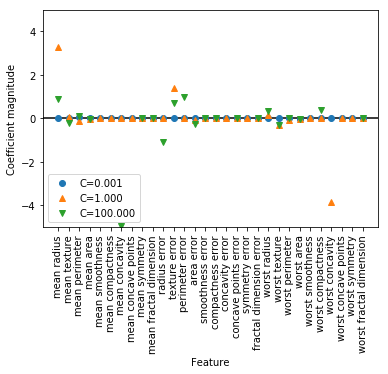

In [52]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

# Linear Models for multiclass classification

 - Many linear classification models are binary models, and don’t extend naturally to the multi-class case (with the exception of Logistic regression). A common technique to extend a binary classification algorithm to a multi-class classification algorithm is the one-vs-rest approach.
 
  - In the one-vs-rest approach, a binary model is learned for each class, which tries to separate this class from all of the other classes, resulting in as many binary models as there are classes.
  
\begin{align*}
& w[0] x[0] + w[1] x[1] + \dotsc + w[p] * x[p] + b & \text{ (3) classification confidence}
\end{align*}

## We use a two-dimensional dataset, where each class is given by data sampled from a Gaussian distribution.

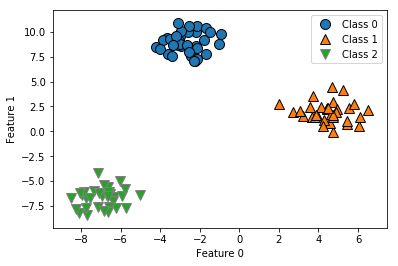

In [53]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [54]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


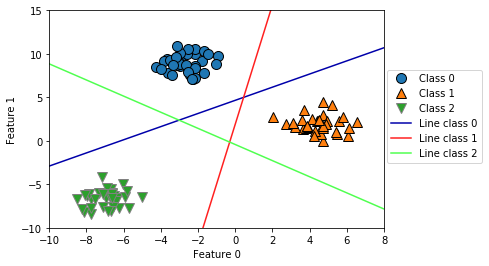

In [55]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

But what about the triangle in the middle of the plot? All three binary classifiers classify points there as “rest”. Which class would a point there be assigned to? The answer is the one with the highest value in Formula (3): the class of the closest line.

Text(0,0.5,'Feature 1')

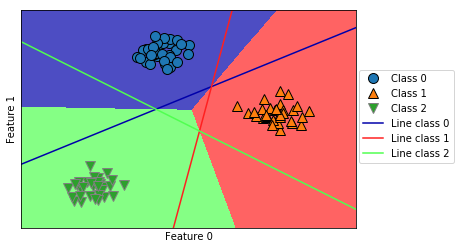

In [56]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

 # Strengths, weaknesses and parameters

 - The main parameter of linear models is the regularization parameter, called alpha in the regression models and C in LinearSVC and LogisticRegression.
 
  - C and alpha are searched for on a logarithmic scale.
  
  
 - L1 can also be useful if interpretability of the model is important. As L1 will use only a few features, it is easier to explain which features are important to the model, and what the effect of these features is.
 
 - If your data consists of hundreds of thousands or millions of samples, you might want to investigate SGDClassifier and SGDRegressor, which implement even more scalable versions of the linear models described above.
 
 - Another strength of linear models is that they make i] relatively easy to understand how a prediction is made, using Formula (1) for regression and Formula (2) for classification. Unfortunately, it is often not entirely clear why coefficients are the way they are. This is particularly true if your dataset has highly correlated features; in these cases, the coefficients might be hard to interpret.

# 메서드 연결 

모든 Scikit-learn의 fit 메서드는 self를 반환함.(파이썬에서 self는 호출된 메서드를 정의한 객체 자신을 나타냄)

In [57]:
# instantiate model and fit it in one line
logreg = LogisticRegression().fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


fit 메서드의 반환값(즉, self)은 학습된 모델로, 변수 logreg에 할당합니다. 이처럼 메서드 호출을 잇는 것 (여기서는 __init__와 fit)을 메서드 연결(Method changing)

In [58]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [59]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Naive Bayes Classifiers

 - Naive Bayes classifiers are a family of classifiers that are quite similar to the linear models discussed above. However, they tend to be even faster in training.
 
  - The price paid for this efficiency is that naive Bayes models often provide generalization performance that is slightly worse than linear classifiers like LogisticRegression and LinearSVC.
  
  
 ## The reason that naive Bayes models are so efficient is that they learn parameters by looking at each feature individually, and collect simple per-class statistics from each feature.

 - GaussianNB can be applied to any continuous data, while BernoulliNB assumes binary data and MultinomialNB assumes count data (that is each feature represents an integer count of something, like how often a word appears in a sentence). 

 - BernoulliNB and MultinomialNB are mostly used in text data classification, and we will revisit them in Chapter 7 (Text Data).

The BernoulliNB classifier counts how often every feature of each class is not zero. This is most easily understood with an example:

In [60]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [61]:
counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n", counts)

Feature counts:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


 - The other two naive Bayes models, MultinomialNB and GaussianNB are slightly different in what kind of statistics they compute. MultinomialNB takes into account the average value of each feature for each class, while GaussianNB stores the average value as well as the standard deviation of each feature for each class.

# https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c


# https://sebastianraschka.com/Articles/2014_naive_bayes_1.html
# http://blog.datumbox.com/machine-learning-tutorial-the-naive-bayes-text-classifier/


# https://scikit-learn.org/stable/modules/naive_bayes.html

# Strengths, weaknesses and parameters

- The MultinomialNB and BernoulliNB have a single parameter alpha, which controls model complexity. The way alpha works is that the algorithm adds alpha many virtual data points to the data, that have positive values for all the features.

- This results in a “smoothing” of the statistics.

- The GaussianNB model seems to be rarely used by practitioners, while the other two variants of naive Bayes are widely used for sparse count data such as text. MultinomialNB usually performs better than BinaryNB, in particular on datasets with a relatively large number of non-zero features (i.e. large documents).

 - The naive Bayes models share many of the strengths and weaknesses of the linear models. They are very fast to train and to predict, and the training procedure is easy to understand.

# Decision trees

##  Decision trees are a widely used models for classification and regression tasks.

### Essentially, they learn a hierarchy of “if-else” questions, leading to a decision.

 - These questions are similar to the questions you might ask in a game of twenty questions.
 
 
- Imagine you want to distinguish between the following four animals: bears, hawks, penguins and dolphins.
 
 
- Your goal is to get to the right answer b] asking as few if-else questions as possible.


- In this illustration, each node in the tree either represents a question, or a terminal node (also called a leaf) which contains the answer. The edges connect the answers to a question with the next question you would ask.

In [62]:
#!pip uninstall graphviz

In [63]:
!pip install graphviz

You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [64]:
#!conda install graphviz

In [65]:
#mglearn.plots.plot_animal_tree()

# Building Decision Trees 

 - Let’s go through the process of building a decision tree for the 2d classification dataset shown at the top of Figure tree_building. The dataset consists of two half-moon shapes of blue and red points, consisting of 75 data points each.

In [66]:
#mglearn.plots.plot_tree_progressive()

 - Learning a decision tree means learning a sequence of if/else questions that gets us to the true answer most quickly. 
 
 - In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is).

 - The second row in Figure tree_building shows the first test that is picked. Splitting the dataset vertically at x[1]=0.2372 yields the most information; it best separates the blue points from the red points. The top node, also called the root, represents the whole dataset, consisting of 75 red and 75 blue points.
 
 # https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052
 
 - Alternatively, you can think of each test as splitting the part of the data that is currently considered along one axis. This yields a view of the algorithm as building a hierarchical partition.

## Controlling complexity of Decision Trees

 - Typically, building a tree as described above, and continuing until all leaves are pure leads to models that are very complex and highly overfit to the training data.
 - decision boundary to look, and the decision boundary focuses a lot on single outlier points that are far away from the other points in that class
 
### There are two common strategies to prevent overfitting: stopping the creation of the tree early, also called pre-pruning, or building the tree but then removing or collapsing nodes that contain little information, also called post-pruning or just pruning.

 - Decision trees in scikit-learn are implemented in the DecisionTreeRegressor and DecisionTreeClassifier classes. Scikit-learn only implements pre-pruning, not postpruning.

In [67]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


 - As expected, the accuracy on the training set is 100% as the leaves are pure.
 
  - Now let’s apply pre-pruning to the tree, which will stop developing the tree before we perfectly fit to the training data.
  
  - Here we set max_depth=4 

In [68]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("accuracy on training set: %f" % tree.score(X_train, y_train))
print("accuracy on test set: %f" % tree.score(X_test, y_test))

accuracy on training set: 0.988263
accuracy on test set: 0.951049


 - Limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

# Analyzing Decision Trees

In [69]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

 - The visualization of the tree provides a great in-depth view of how the algorithm makes predictions, and is a good example of a machine learning algorithm that is easily explained to non-experts.
 
  - However, even with a tree of depth four, as seen here, the tree can become a bit overwhelming

# Feature Importance in trees

 - Instead of looking at the whole tree, which can be taxing, there are some useful statistics that we can derive properties that we can derive to summarize the workings of the tree
 
  - The most commonly used summary is feature importance, which rates how important each feature is for the decision a tree makes.
  
  - It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target”

In [71]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


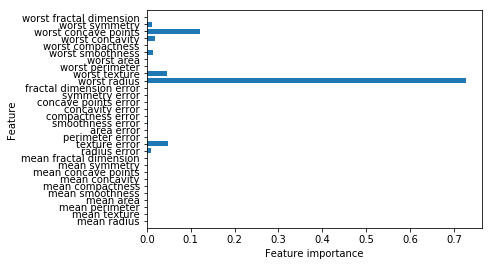

In [72]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

 - Here, we see that the feature used at the top split (“worst radius”) is by far the most important feature. This confirms our observation in analyzing the tree, that the first level already separates the two classes fairly well.
 
  - However, if a feature has a low feature_importance, it doesn’t mean that this feature is uninformative.

Feature importances: [0. 1.]


ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

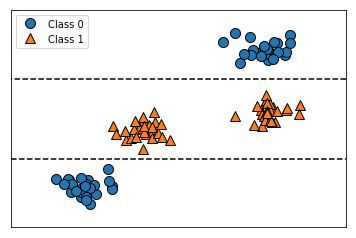

In [73]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0,0.5,'Price in $/Mbyte')

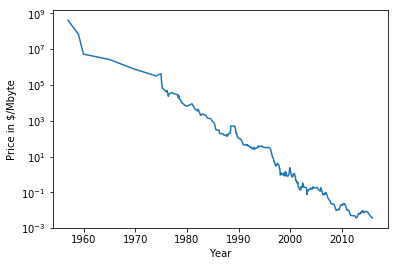

In [76]:
import pandas as pd
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [77]:

from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

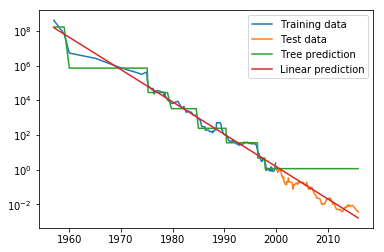

In [78]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

# Strengths, weaknesses and parameters

- Ensembles are methods that combine multiple machine learning models to create more powerful models.

- Usually picking one of the pre-pruning strategies, either setting min_depth, max_leaf_nodes or min_samples_leaf is to prevent overfitting.

# Ensembles of Decision Trees

 - Ensembles are methods that combine multiple machine learning models to create more powerful models.
  - both of which use decision trees as their building block: Random Forests and Gradient Boosted Decision Trees.
  
 ## Random Forests
  - As observed above, a main drawback of decision trees is that they tend to overfit the training data.
  
   - Random forests are one way to address this problem.
   
   - Random forests are essentially a collection of decision trees, where each tree is slightly different from the others.
   
 # https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd
 
  - If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results.
  
   - There are two ways in which the trees in a random forest are randomized: by selecting the data points used to build a tree and by selecting  the features in each split test.

### Building Random Forests 

- To build a random forest model, you need to decide on the number of trees to build (the n_estimator parameter of RandomForestRegressor or RandomForestClassifier).

 - To build a tree, we first take what is called a bootstrap sample of our data.
 
  - A bootstrap sample means from our n_samples data points, we repeatedly draw an example randomly with replacement (i.e. the same sample can be picked multiple times), n_samples times.
  
   - This will create a dataset that is as big as the original dataset, but some data points will be missing from it, and some will be repeated.
   
    - To illustrate, lets say we want to create a bootstrap sample of the list ['a', 'b', 'c','d']. A possible bootstrap sample would be ['b', 'd', 'd', 'c']. Another possible sample would be ['d', 'a', 'd', 'a'].
    
    
   - Next, a decision tree is built based on this newly created dataset.
   
   - Instead of looking for the best test for each node, in each node the algorithm randomly selects a subset of the features, and looks for the best possible test involving one of these features.
   
   - The amount of features that is selected is controlled by the max_features parameter.
   
   - This selection of a subset of features is repeated separately in each node, so that each node in a tree can make a decision using a different subset of the features.
   
   - The bootstrap sampling leads to each decision tree in the random forest being built on a slightly different dataset. Because of the selection of features in each node, each split in each tree operates on a different subset of features. Together these two mechanisms ensure that all the trees in the random forests are different.
   
   - To make a prediction using the random forest, the algorithm first makes a prediction for every tree in the forest.

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

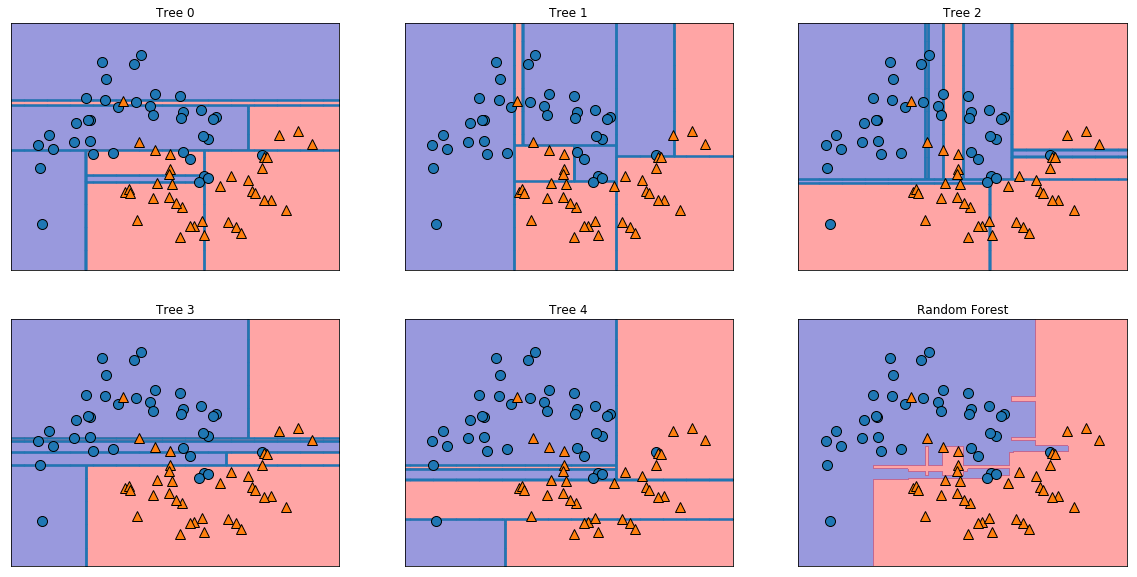

In [80]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

Let’s visualize the decision boundaries learned by each tree, together with their aggregate prediction, as made by the forest.

In [81]:
#Let’s apply a random forest consisting of 100 trees on the breast cancer dataset:

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


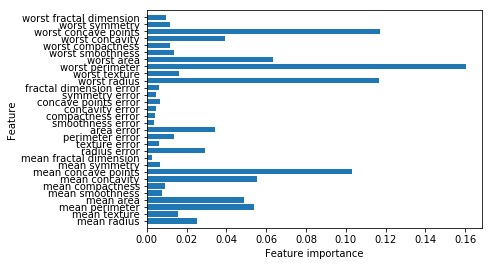

In [82]:
plot_feature_importances_cancer(forest)

# Strengths, weaknesses and parameters

 - Essentially, random forests share all of the benefits of decision trees, while making up for some of their deficiencies.
 
  - Therefore, if you need to summarize the prediction making in a visual way to non-experts, a single decision tree might be a better choice.
  
   - While building random forests on large dataset might be somewhat time-consuming, it an be parallelized across multiple CPU cores within a computer easily.
   
   - You can set n_jobs=-1 to use all the cores in your computer.
   
   - You should keep in mind that random forests, by their nature, are random, and setting different random states (or not setting the random_state at all) can drastically change the model that is built.
   
   - it is important to fix the random_state. 
   
   - Random forests don’t tend to perform well on very high dimensional, sparse data, such as text data.
   
   - If time and memory are important in an application, it might make sense to use a linear model instead.
   
   - The important parameters to adjust are n_estimators, max_features and possibly pre-pruning options like max_depth.
   
   - For n_estimators, larger is always better

# Gradient Boosted Regression Trees (Gradient Boosting Machines)

 - Gradient boosted regression trees is another ensemble method that combines multiple decision trees to a more powerful model. Despite the “regression” in the name,these models can be used for regression and classification
 
  - In contrast to random forests, gradient boosting works by building trees in a serial manner, where each tree tries to correct the mistakes of the previous one.
  
# https://medium.com/@gabrieltseng/gradient-boosting-and-xgboost-c306c1bcfaf5

- There is norandomization in gradient boosted regression trees; instead, strong pre-pruning is used. 

- Gradient boosted trees often use very shallow trees, of depth one to five, often making the model smaller in terms of memory, and making predictions faster.

- The main idea behind gradient boosting is to combine many simple models (in this context known as weak learners), like shallow trees.

- Gradient boosted trees are frequently the winning entries in machine learning competitions, and are widely used in industry.

- Apart from the pre-pruning and the number of trees in the ensemble, another important parameter of gradient boosting is the learning_rate which controls how strongly each tree tries to correct the mistakes of the previous trees.

 - A higher learning rate means each tree can make stronger corrections, allowing for more complex models.

In [83]:
# By default, 100 trees of maximum depth three are used, with a learning rate of 0.1.
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


In [84]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [85]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


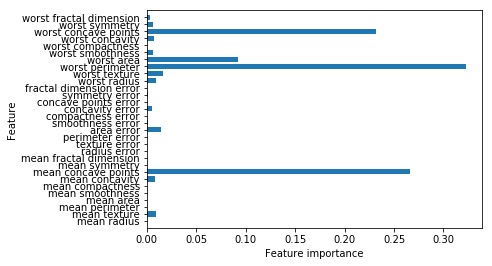

In [86]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

We can see that the feature importances of the gradient boosted trees are somewhat similar to the feature importances of the random forests, though the gradient boosting completely ignored some of the features.

# Strengths, weaknesses and parameters
 - Their main drawback is that they require careful tuning of the parameters, and may take a long time to train.
 
 - Similarly to other tree-based models, the algorithm works well without scaling and on a mixture of binary and continuous features.
 
 - These two parameters are highly interconnected, as a lower learning_rate means that more trees are needed to build a model of similar complexity. In contrast to random forests, where higher n_estimators is always better, increasing n_estimators in gradient boosting leads to a more complex model, which may lead to overfitting.

# Kernelized Support Vector Machines

 - Kernelized support vector machines (often just referred to as SVMs) are an extension that allows for more complex models which are not defined simply by hyperplanes in the input space.
 
 # https://towardsdatascience.com/understanding-support-vector-machine-part-2-kernel-trick-mercers-theorem-e1e6848c6c4d
 
 ## Linear Models and Non-linear Features
 
  - As you saw in Figure linear_classifiers, linear models can be quite limiting in lowdimensional spaces, as lines or hyperplanes have limited flexibility.
  - One way to make a linear model more flexible is by adding more features, for example by adding interactions or polynomials of the input features.

Text(0,0.5,'Feature 1')

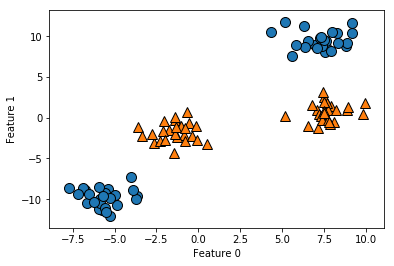

In [87]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0,0.5,'Feature 1')

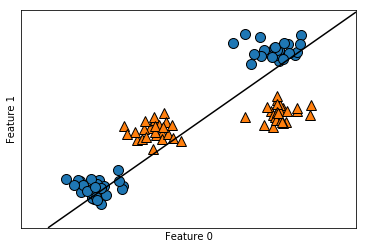

In [88]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Now, let’s expand the set of input features, say by also adding feature 2 \** 2, the
square of the second feature, as a new feature. Instead of representing each data point
as a two-dimensional point (feature1, feature2), we now represent it as a threedimensional
point (feature1, feature2, feature2 ** 2) (Footnote: We picked
this particular feature to add for illustration purposes. The choice is not particular
important.).

Text(0.5,0,'feature1 ** 2')

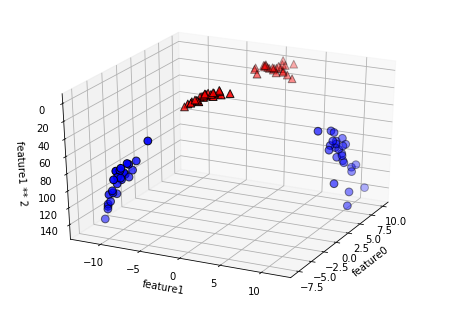

In [90]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5,0,'feature1 ** 2')

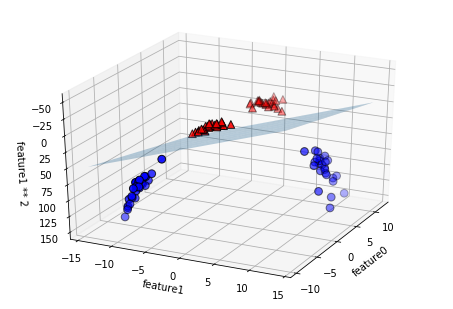

In [91]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

As a function of the original features, the linear SVM model is not actually linear anymore.
It is not a line, but more of an ellipse.

Text(0,0.5,'Feature 1')

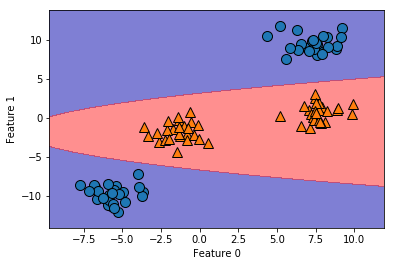

In [92]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# The Kernel Trick 

 - The lesson here is that adding non-linear features to the representation of our data can make linear models much more powerful.
 
 - Luckily, there is a clever mathematical trick that allows us to learn a classifier in a higher dimensional space without actually computing the new, possibly very large representation. This trick is known as the kernel trick.
 - There are two ways to map your data into a higher dimensional space that are commonlyused with support vector machines: the polynomial kernel, which computes allpossible polynomials up to a certain degree of the original features (like feature1 \** 2 * feature2 ** 5), and the radial basis function (rbf) kernel, also known as Gaussiankernel.
 
 # https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589

# Understanding SVMs

- During training, the SVM learns how important each of the training data points is to represent the decision boundary between the two classes. Typically only a subset of the training points matter for defining the decision boundary: the ones that lie on the border between the classes. These are called support vectors and give the support vector machine its name.



 - ZThe way distance between data points is measured by the Gaussian kernel:
\begin{align*}
&k_\text{rbf}(x_1, x_2) = \exp(\gamma||x_1 - x_2||^2) &\text{ (4) Gaussian kernel}
\end{align*}

Here, $x_1$ and $x_2$ are data points, $||x_1 - x_2 ||$ denotes Euclidean distance
and $\gamma$ is a parameter that controls the width of the Gaussian kernel.

Text(0,0.5,'Feature 1')

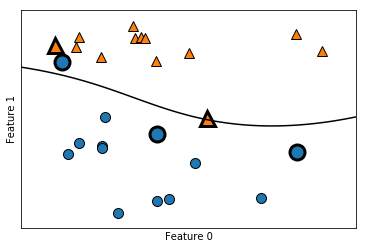

In [93]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# Tuning SVM parameters

- The gamma parameter is the one shown in Formula (4), which controls the width of the Gaussian kernel. It determines the scale of what it means for points to be close together.

- The C parameter is a regularization parameter similar to the linear models. It limits the importance of each point (or more precisely, their dual_coef_).

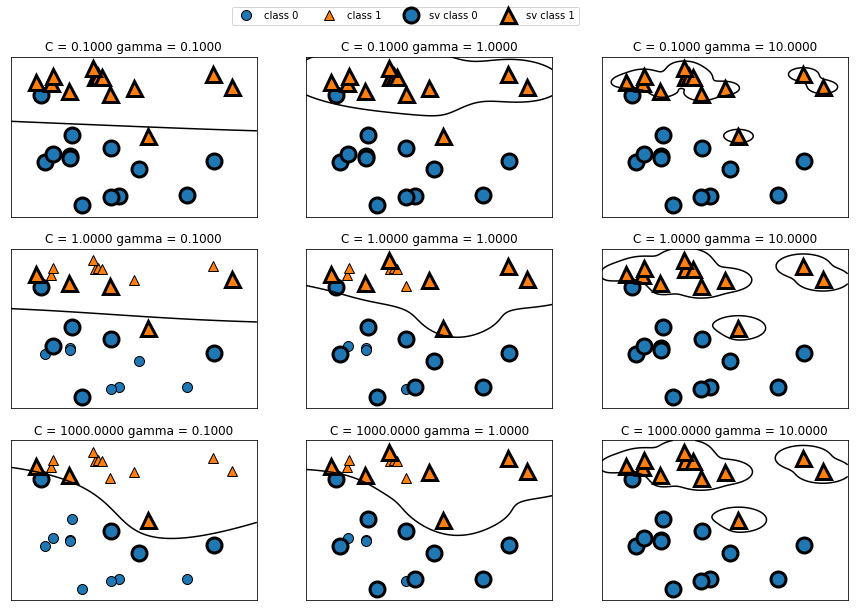

In [94]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

This is reflected in very smooth decision boundaries on the left, and boundaries that focus more on single points further to the right. A low value of gamma means that the decision boundary will vary slowly, which yields a model of low complexity, while a high value of gamma yields a more complex model.

In [95]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0,0.5,'Feature magnitude')

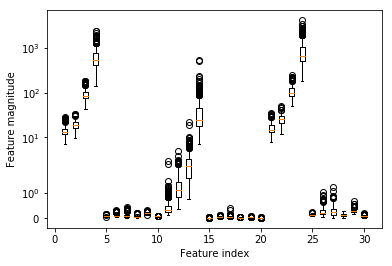

In [96]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

# Preprocessing Data for SVMs 

 - One way to resolve this problem is by rescaling each feature, so that they are approximately on the same scale.
 
 - A common rescaling methods for kernel SVMs is to scale the data such that all features are between zero and one.
 
 # https://medium.com/@ian.dzindo01/feature-scaling-in-python-a59cc72147c1

In [97]:
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

Minimum for each feature
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [98]:
# use THE SAME transformation on the test set,
# using min and range of the training set. See Chapter 3 (unsupervised learning) for details.
X_test_scaled = (X_test - min_on_training) / range_on_training

In [99]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [100]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Strengths, weaknesses and parameters

- Kernelized support vector machines are very powerful models and perform very well on a variety of datasets.

- SVMs allow for very complex decision boundaries, even if the data has only a few features.

- SVMs work well on low-dimensional and high-dimensional data (i.e. few and many features), but don’t scale very well with the number of samples.

- Another downside of SVMs is that they require careful preprocessing of the data and tuning of the parameters.

- For this reason, SVMs have been replaced by tree-based models such as random forests (that require little or no preprocessing) in many applications. Furthermore, SVM models are hard to inspect; it can be difficult to understand why a particular prediction was made, and it might be tricky to explain the model to a non-expert.

- The important parameters in kernel SVMs are the regularization parameter C, the choice of the kernel, and the kernel-specific parameters. We only talked about the rbf kernel in any depth above, but other choices are available in scikit-learn. The rbf kernel has only one parameter, gamma, which is the inverse of the width of the Gaussian kernel. gamma and C both control the complexity of the model, with large values in either resulting in a more complex model. Therefore, good settings for the two parameters are usually strongly correlated, and C and gamma should be adjusted together.

# Neural Networks (Deep Learning)

 - we will only discuss some relatively simple methods, namely multilayer perceptrons for classification and regression, that can serve as a starting point for more involved deep learning methods.
 
 # https://medium.com/datadriveninvestor/the-basics-of-neural-networks-304364b712dc

# The Neural Network Model
In words, y is a weighted sum of the input features x[0] to x[p], weighted by the
learned coefficients w[0] to w[p]. We could visualize this graphically as:

In [101]:
mglearn.plots.plot_logistic_regression_graph()

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

where each node on the left represents an input feature, the connecting lines represent
the learned coefficients, and the node on the right represents the output, which is
a weighted sum of the inputs.

In an MLP, this process of computing weighted sums is repeated multiple times, first
computing hidden units that represent an intermediate processing step, which are
again combined using weighted sums, to yield the final result:

In [102]:
print("Figure single_hidden_layer")
mglearn.plots.plot_single_hidden_layer_graph()

Figure single_hidden_layer


ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

 - This model has a lot more coefficients (also called weights) to learn: there is one between every input and every hidden unit (which make up the hidden layer), and one between every unit in the hidden layer and the output.
 
 - computing a weighted sum for each hidden unit, a non-linear function is applied to the result, usually the rectifying nonlinearity (also known as rectified linear unit or relu) or the tangens hyperbolicus (tanh).
 
 - Either non-linear function allows the neural network to learn much more complicated function than a linear model could.

Text(0,0.5,'relu(x), tanh(x)')

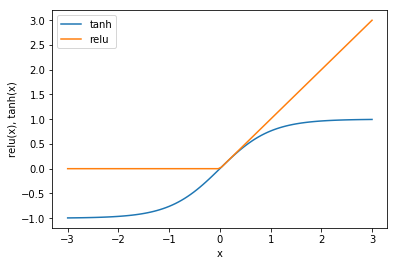

In [103]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")